# Seattle Airbnb Data Analysis

As part of the Udacity data science nanodegree program, I will be analyzing the Airbnb Seattle dataset.

# 1. Business Understanding:

Below are some of the questions which I will be trying to answer by end of the project:

1. Does price have any seasonality effect?
2. Does price fluctuate based on the day of the week (weekdays vs weekend)?
3. Do certain amenities influence the price factor?

# 2. Data Understanding: Load and validate the datasets

### 2a. Loading datasets

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
#Importing the datasets
calendar_df=pd.read_csv('calendar.csv')
listing_df=pd.read_csv('listings.csv')
review_df=pd.read_csv('reviews.csv')

In [3]:
#Viewing the datasets
calendar_df.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [4]:
listing_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [5]:
review_df.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


### 2b. Validating all the datasets

In [6]:
#Validating the calendar dataset

#Checking number of rows and columns
print('Number of rows and columns:',calendar_df.shape)
print('---------------------------------------------------------------------------')
print()

#Checking datatypes for columns present in calendar dataset
print(calendar_df.dtypes)
print('---------------------------------------------------------------------------')
print()

#Checking the primary key 
print('Count of unique listing id and date combinations', calendar_df.groupby(['listing_id', 'date']).ngroups)
print('---------------------------------------------------------------------------')
print()

#Number of missing values
print('Percentage of Missing values:',(calendar_df.isnull().sum()/len(calendar_df))*100)
print('---------------------------------------------------------------------------')
print()

Number of rows and columns: (1393570, 4)
---------------------------------------------------------------------------

listing_id     int64
date          object
available     object
price         object
dtype: object
---------------------------------------------------------------------------

Count of unique listing id and date combinations 1393570
---------------------------------------------------------------------------

Percentage of Missing values: listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64
---------------------------------------------------------------------------



In [7]:
#Validating the listing dataset

#Checking number of rows and columns
print('Number of rows and columns:',listing_df.shape)
print('---------------------------------------------------------------------------')
print()

#Checking datatypes for columns present in listing dataset
print(listing_df.dtypes)
print('---------------------------------------------------------------------------')
print()

#Checking the primary key
print('Count of unique ids', listing_df.groupby(['id']).ngroups)
print('---------------------------------------------------------------------------')
print()

#Number of missing values
print('Percentage of Missing values:',(listing_df.isnull().sum()/len(listing_df))*100)
print('---------------------------------------------------------------------------')
print()

Number of rows and columns: (3818, 92)
---------------------------------------------------------------------------

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host

In [8]:
#Validating the Reviews dataset

#Checking number of rows and columns
print('Number of rows and columns:',review_df.shape)
print('---------------------------------------------------------------------------')
print()

#Checking datatypes for columns present in Reviews dataset
print(review_df.dtypes)
print('---------------------------------------------------------------------------')
print()

#Checking the primary key
print('Count of unique ids', review_df.groupby(['id']).ngroups)
print('---------------------------------------------------------------------------')
print()

#Number of missing values
print('Percentage of Missing values:',(review_df.isnull().sum()/len(review_df))*100)
print('---------------------------------------------------------------------------')
print()

Number of rows and columns: (84849, 6)
---------------------------------------------------------------------------

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object
---------------------------------------------------------------------------

Count of unique ids 84849
---------------------------------------------------------------------------

Percentage of Missing values: listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.021214
dtype: float64
---------------------------------------------------------------------------



# 3. Data Processing:

In [9]:
#Removing special characters such as dollar sign and commas
def remove_signs(dataset, column):
    dataset[column] = dataset[column].str.replace('$','').str.replace(',','');
#Converting some fields to numeric type
def convert_to_numeric(dataset, column):
    dataset[column] = pd.to_numeric(dataset[column]);
#Transforming some fields to boolean
def convert_to_boolean(dataset, column):
    dataset[column] = dataset[column] == 't'

In [10]:
#Treating the fields by removing special characters and converting to suitable data type
remove_signs(calendar_df, 'price')
convert_to_numeric(calendar_df, 'price')
convert_to_boolean(calendar_df, 'available')
remove_signs(listing_df, 'price')
convert_to_numeric(listing_df, 'price')
calendar_df.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0


In [11]:
#Replacing the missing price values with 0
calendar_df["price"].fillna(0, inplace=True)
listing_df["price"].fillna(0, inplace=True)
calendar_df[calendar_df['price']==0].available.unique()

array([False])

In [12]:
#scrape_id field contains same value across all records, hence, removing this field
#host_listings_count and host_total_listings_count columns are identical so eliminating one of them
print(listing_df['host_listings_count'].equals(listing_df['host_total_listings_count']))
print(listing_df['scrape_id'].nunique())
listing_df.drop(['scrape_id', 'host_listings_count'], axis=1, inplace=True)

True
1


In [13]:
#Looking at the date range present in the data
print(" Date range for all the listings: ",calendar_df['date'].min(),"to ", calendar_df['date'].max())

 Date range for all the listings:  2016-01-04 to  2017-01-02


In [14]:
#Processing date column and extracting month from it
calendar_df['date_updated'] = pd.to_datetime(calendar_df['date'])
calendar_df['month']=calendar_df['date_updated'].dt.month

In [15]:
#Identify all the categorical features in calendar table
print("List of categorical variables", calendar_df.select_dtypes(include="object").columns)

#Identify all the quantitative features in calendar table
print("List of quantitative variables", calendar_df.select_dtypes(include=("float64","int64")).columns)

List of categorical variables Index(['date'], dtype='object')
List of quantitative variables Index(['listing_id', 'price', 'month'], dtype='object')


In [16]:
#Identify all the categorical variables in listing table
print("List of categorical variables", listing_df.select_dtypes(include="object").columns)

#Identify all the quantitative variables in listing table
print("List of quantitative variables", listing_df.select_dtypes(include=("float64","int64")).columns)

List of categorical variables Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'calendar_updated', 'has_availability', 'c

In [17]:
#Identify all the categorical variables in review table
print("List of categorical variables", review_df.select_dtypes(include="object").columns)

#Identify all the quantitative variables in review table
print("List of quantitative variables", review_df.select_dtypes(include=("float64","int64")).columns)

List of categorical variables Index(['date', 'reviewer_name', 'comments'], dtype='object')
List of quantitative variables Index(['listing_id', 'id', 'reviewer_id'], dtype='object')


# 4. Performing EDA on the datasets

<h3> Calendar Dataset:

In [18]:
#Calculating the sum of all prices charged so far
total_amount=np.sum(calendar_df["price"])
print("Sum of all prices throughout the year: $",total_amount)

Sum of all prices throughout the year: $ 128915264.0


In [19]:
#Evaluating the sum of prices charged at month level
monthly_bookings=pd.DataFrame(columns=['Number of bookings'])
monthly_bookings=calendar_df.groupby('month')['price'].count()
print(monthly_bookings)

month
1     114540
2     110722
3     118358
4     114540
5     118358
6     114540
7     118358
8     118358
9     114540
10    118358
11    114540
12    118358
Name: price, dtype: int64


In [20]:
#Average listing price for the whole year
avg_price=total_amount/calendar_df['listing_id'].nunique()  
print("Average earning per listing: $",round(avg_price,0))

Average earning per listing: $ 33765.0


In [21]:
#Median amount charged per listing
print("Average price charged per listing: $", round(calendar_df['price'].mean(),0))
#Average price per listing 
print("Median price charged per listing: $", round(calendar_df['price'].median(),0))

Average price charged per listing: $ 93.0
Median price charged per listing: $ 75.0


In [22]:
#Average amount charged per listing
mean_price_listing=calendar_df.groupby('listing_id')['price'].mean()
#Median amount charged for the top 5 listings
print("Average price for top 5 most expensive listings: $",round(mean_price_listing.nlargest(5).median(),0))

Average price for top 5 most expensive listings: $ 950.0


In [23]:
#Checking listing availability
listing_availability=(calendar_df.groupby('available')['listing_id'].count()/calendar_df.shape[0])*100
print("Listings avaialbility throughout the year:", round(listing_availability,0))

Listings avaialbility throughout the year: available
False    33.0
True     67.0
Name: listing_id, dtype: float64


In [24]:
#Average Price charged per month
calendar_df.groupby('month').agg({'price':['mean', 'median']}).round(1).reset_index()

month  price       
           mean median
0      1   69.7   55.0
1      2   82.3   70.0
2      3   91.2   79.0
3      4   89.7   75.0
4      5   94.3   78.0
5      6   99.5   79.0
6      7   95.4   70.0
7      8   97.2   75.0
8      9   96.6   79.0
9     10   95.4   80.0
10    11   96.9   80.0
11    12  101.0   85.0

Text(0,0.5,'Median Price at month level')

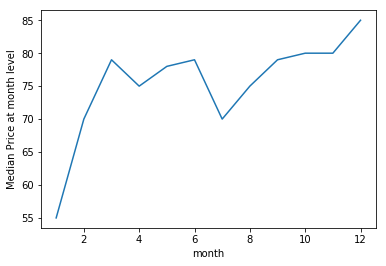

In [25]:
monthly_price=calendar_df.groupby('month')['price'].median().plot()
plt.ylabel('Median Price at month level')

<h3> Listing Dataset:

In [26]:
#Aggregated data by host response time
listing_df['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [27]:
#create a table with ratings scores and find out correlation between them
listing_review_df=listing_df[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','price']]

corr_ratings=listing_review_df.corr()
corr_ratings

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
review_scores_rating,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.055551
review_scores_accuracy,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878,0.019026
review_scores_cleanliness,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354,0.054357
review_scores_checkin,0.521813,0.407238,0.398696,1.000000,0.696345,0.240903,0.403263,0.007877
review_scores_communication,0.540620,0.423189,0.388146,0.696345,1.000000,0.284635,0.463772,0.012990
review_scores_location,0.368423,0.267605,0.277834,0.240903,0.284635,1.000000,0.368252,0.075069
review_scores_value,0.696534,0.562878,0.524354,0.403263,0.463772,0.368252,1.000000,-0.041776
price,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,1.000000


In [28]:
#create a table with amenities details and find out correlation between them
df_amenities=listing_df[['bathrooms', 'bedrooms', 'beds','guests_included',
       'minimum_nights', 'maximum_nights','price']]

corr_amenities=df_amenities.corr()
corr_amenities

,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,price
bathrooms,1.000000,0.610937,0.532838,0.304780,0.006358,-0.015322,0.516424
bedrooms,0.610937,1.000000,0.753167,0.457009,0.011957,-0.008591,0.627720
beds,0.532838,0.753167,1.000000,0.460512,0.002670,-0.009114,0.589525
guests_included,0.304780,0.457009,0.460512,1.000000,-0.001659,-0.018637,0.392875
minimum_nights,0.006358,0.011957,0.002670,-0.001659,1.000000,0.003161,0.017297
maximum_nights,-0.015322,-0.008591,-0.009114,-0.018637,0.003161,1.000000,-0.003336
price,0.516424,0.627720,0.589525,0.392875,0.017297,-0.003336,1.000000


In [29]:
#Checking price at room type level
listing_df.groupby('room_type').agg({'price':'mean', 'id':'count'})

,price,id
room_type,,
Entire home/apt,155.843369,2541
Private room,75.044828,1160
Shared room,47.547009,117


In [30]:
#Checking price at bed type level
listing_df.groupby('bed_type').agg({'price':'mean', 'id':'count'})

,price,id
bed_type,,
Airbed,73.962963,27
Couch,64.307692,13
Futon,72.824324,74
Pull-out Sofa,77.276596,47
Real Bed,130.368882,3657


# 5. Analyzing the data and answering key questions

### 1. Does price have any seasonality effect?

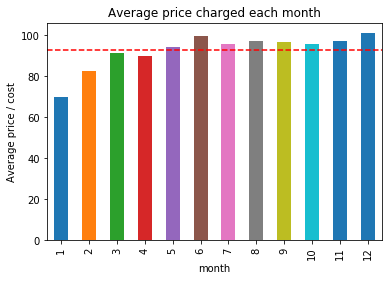

In [31]:
month_price_listing=calendar_df.groupby('month')['price'].mean()
month_price_listing.plot(kind="bar");
plt.xlabel('month')
plt.ylabel('Average price / cost')
plt.title("Average price charged each month")
plt.axhline(month_price_listing.mean(),color='r',linestyle='--')

### Observation:<br>
In June and December prices are relatively high. Our hypothesis would be that these months are for summer vacation and christmas, hence, the prices are higher than usual. On the other hand, prices in Q1 are significantly lower than the average for the entire year.

### 2. Does price fluctuate based on the day of the week (weekdays vs weekend)?

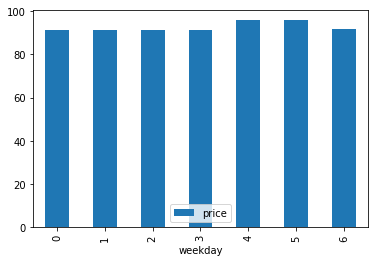

In [32]:
#Checking if price is impacted or decided based on the day of the week i.e. weekday or weekend
calendar_df['weekday'] = pd.DatetimeIndex(calendar_df['date']).weekday
calendar_df.groupby(['weekday'])[['price']].mean().plot(kind="bar");

### Observation:

From this chart, we can see that Friday and Saturday are the highest priced days in a week since tourists will prefer weekend for vacation over weekdays. Also, they would prefer coming back to their hometown on Sunday, hence price for Sunday is relatively on the lower side.

### 3. Do certain amenities influence the price factor?

In [33]:
#Checking which amenities are influencing the price factor
df_amenities=listing_df[['bathrooms', 'bedrooms', 'beds','guests_included',
       'minimum_nights', 'maximum_nights','price']]

corr_amenities=df_amenities.corr()
corr_amenities

,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,price
bathrooms,1.000000,0.610937,0.532838,0.304780,0.006358,-0.015322,0.516424
bedrooms,0.610937,1.000000,0.753167,0.457009,0.011957,-0.008591,0.627720
beds,0.532838,0.753167,1.000000,0.460512,0.002670,-0.009114,0.589525
guests_included,0.304780,0.457009,0.460512,1.000000,-0.001659,-0.018637,0.392875
minimum_nights,0.006358,0.011957,0.002670,-0.001659,1.000000,0.003161,0.017297
maximum_nights,-0.015322,-0.008591,-0.009114,-0.018637,0.003161,1.000000,-0.003336
price,0.516424,0.627720,0.589525,0.392875,0.017297,-0.003336,1.000000


### Observation:

Bedrooms, beds and bathrooms tend to have positive realtionship with price whereas minimum or maximum nights offered amenities do not impact/influence price as much.